# Final Assignment

# Correlation Between Companies in The Same Industry

Summary of Contents

- [1 Introduction](#toc_1)
- [2 Questions 2 heading](#toc_2)
- [3 Import Required Libraries](#toc_3)


<a name="toc_1"></a>
# Introduction

<a name="toc_2"></a>
# Questions

Are pairs in the same industry more closely correlated in their price movements than random pairs

If pairs are more closely correlated, do they also show higher levels of co-integration.

How many different stocks would we have to obtain data for to have a sufficient sample size?

How many pairs would would be need to select to have a sufficient sample size?

Do some industries show better correlation than others?

If there is a corrleation difference, is the correlation difference significant over a longer period such as a year vs a shorter period such as one month.



<a name="toc_3"></a>
# Import Required Libraries

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd

from datetime import datetime, timedelta

In [2]:
import itertools

In [3]:
from random import sample

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Inputs

In [5]:
# Target Input Files
STOCK_PRICES_FNAME = "prices_shares.csv"
FX_PRICES_FNAME = "prices_fx.csv"
SP500_MEMBERS_FNAME = "sp500_info.csv"
ASX_MEMBERS_FNAME = "asx_15_info.csv"

#FILEPATH = "C:\\Dropbox\\Variance\\UNSW\\ZZEN9021\\"

In [6]:
"""
cols = ['Symbol', 'Security','GICS Sector']

data = [
['BHP.AX', 'BHP GROUP' ,'Materials'],
['FMG.AX', 'FORTESCUE', 'Materials'],
['MQG.AX', 'MACQUARIE GROUP', 'Financials'],
['CBA.AX', 'COMMONWEATH BANK', 'Financials'],
['RIO.AX', 'RIO TINTO', 'Materials'],
['CSL.AX', 'CSL', 'Health Care'],
['WDS.AX', 'WOODSIDE','Energy'],
['ANZ.AX', 'ANZ GROUP', 'Financials'],
['PLS.AX', 'PILBARAMIN', 'Materials'],
['NAB.AX', 'NATIONAL AUSTRALIA BANK', 'Financials'],
['WBC.AX', 'WESTPAC ', 'Financials'],
['RMD.AX', 'RESMED', 'Health Care'],
['NCM.AX', 'NEWCREST', 'Materials'],
['NST.AX', 'NTH STAR', 'Materials'],
['GMG.AX', 'GOODMAN GROUP', 'Real Estate'],
]

df = pd.DataFrame(data = data, columns=cols)

df.to_csv('asx_15_info.csv', index=False)
df
"""


"\ncols = ['Symbol', 'Security','GICS Sector']\n\ndata = [\n['BHP.AX', 'BHP GROUP' ,'Materials'],\n['FMG.AX', 'FORTESCUE', 'Materials'],\n['MQG.AX', 'MACQUARIE GROUP', 'Financials'],\n['CBA.AX', 'COMMONWEATH BANK', 'Financials'],\n['RIO.AX', 'RIO TINTO', 'Materials'],\n['CSL.AX', 'CSL', 'Health Care'],\n['WDS.AX', 'WOODSIDE','Energy'],\n['ANZ.AX', 'ANZ GROUP', 'Financials'],\n['PLS.AX', 'PILBARAMIN', 'Materials'],\n['NAB.AX', 'NATIONAL AUSTRALIA BANK', 'Financials'],\n['WBC.AX', 'WESTPAC ', 'Financials'],\n['RMD.AX', 'RESMED', 'Health Care'],\n['NCM.AX', 'NEWCREST', 'Materials'],\n['NST.AX', 'NTH STAR', 'Materials'],\n['GMG.AX', 'GOODMAN GROUP', 'Real Estate'],\n]\n\ndf = pd.DataFrame(data = data, columns=cols)\n\ndf.to_csv('asx_15_info.csv', index=False)\ndf\n"

In [7]:
# List of tickers/symbols of currencies that we wish to handle
FX_TICKERS = ["AUDUSD=X", "HKDUSD=X", "JPYUSD=X", "SGDUSD=X"]

The key data we are accessing is pricing information for stocks and fx rates.

Periodically we need to refresh this information as components of the indexes change, corporate actions occur etc.

However, obtaining this information requires downloading it and thus we want to limit that to when required and not download it every time we run the program.

We thus set a flag (REFRESH_DATA) which we can adjust before running the program identifying  whether to refresh our data or not.

In [8]:
# When running within Ed this needs to remain as False as their are restrictions on accessing external web sites
REFRESH_DATA = True

Set constants to determine limits on file size and number of pairs processed to limit processing and memory requirements.

In [9]:
# Instead of choosing all 500 names from the S&P500, pick a selection to reduce the file sizes
SP500_SAMPLE_SIZE = 100

# From our list of all generated pairs, select a random sample to reduce processing requiremens
#RDM_SAMPLE_SIZE = 20000
RDM_SAMPLE_SIZE = 4000

# Obtain Names in SP500

If the refresh data flag is set to True, we run the function to scrape the list of names in the S&P500 from Wikipedia and save this to a csv file.

If flag is set to false, the program will use the current version of the csv file.

In [10]:
def obtain_sp500_info():
    """
    Function to Scrape Details About S&P500 Components from Wikipedia.
    Saves the current S&P Components into a csv file.
    """

    # Scrape the list of components companies in the S&P500 as per Wikipedia
    table=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    
    # Take the first item in the list obtained from table which contains a dataframe of current S&P components 
    df = table[0]
      
    # Save the component stocks to a csv file
    df.to_csv(SP500_MEMBERS_FNAME, index=False)
    
# If refresh flag is True, download current data via running the obtain_sp_500_info function
if REFRESH_DATA:
    obtain_sp500_info()
    

Read the Most current version of the csv file that contains the S&P component information.

In [11]:
sp500_info_df = pd.read_csv(SP500_MEMBERS_FNAME)
sp500_info_df

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
501,ZION,Zions Bancorporation,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


In [12]:
# Trim the number of S&P500 members we are going to review given processing constraints

sp500_info_df = sp500_info_df[:SP500_SAMPLE_SIZE].copy()

Review the number of members to check that it equals the input constant SP500_SAMPLE_SIZE and also that there are no duplicate symbols

In [13]:
print(SP500_SAMPLE_SIZE)
print(sp500_info_df['Symbol'].count())
print(len(sp500_info_df['Symbol'].unique()))

100
100
100


<span style="color:green">&#x2705;</span>

Check for any periods in the stock names for US listed stocks (which includes all our S&P500 members).  Yahoo Finance, which is where we download the prices from, uses the convention that A shares and B shares utilize dashes in their names instead of periods.

In [14]:
sp500_info_df[sp500_info_df['Symbol'].str.contains(".", regex=False)]

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
65,BRK.B,Berkshire Hathaway,Financials,Multi-Sector Holdings,"Omaha, Nebraska",2010-02-16,1067983,1839
81,BF.B,Brown–Forman,Consumer Staples,Distillers & Vintners,"Louisville, Kentucky",1982-10-31,14693,1870


In [15]:
# We need to replace periods with dashs within the Symbol columns for S&P500 related names as per Yahoo Finance convention
sp500_info_df['Symbol'] = sp500_info_df['Symbol'].str.replace(".", "-", regex=False)

# Check to ensure this was successful
sp500_info_df[sp500_info_df['Symbol'].str.contains(".", regex=False)]

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded


<span style="color:green">&#x2705;</span>

# Obtain Names in ASX

In [16]:
asx_info_df = pd.read_csv(ASX_MEMBERS_FNAME)
asx_info_df

,Symbol,Security,GICS Sector
0,BHP.AX,BHP GROUP,Materials
1,FMG.AX,FORTESCUE,Materials
2,MQG.AX,MACQUARIE GROUP,Financials
3,CBA.AX,COMMONWEATH BANK,Financials
4,RIO.AX,RIO TINTO,Materials
5,CSL.AX,CSL,Health Care
6,WDS.AX,WOODSIDE,Energy
7,ANZ.AX,ANZ GROUP,Financials
8,PLS.AX,PILBARAMIN,Materials
9,NAB.AX,NATIONAL AUSTRALIA BANK,Financials


# Merge ASX and S&P500 Names 

In [17]:
all_stocks_info_df = pd.concat([asx_info_df, sp500_info_df[['Symbol', 'Security', 'GICS Sector']]])
all_stocks_info_df                    

,Symbol,Security,GICS Sector
0,BHP.AX,BHP GROUP,Materials
1,FMG.AX,FORTESCUE,Materials
2,MQG.AX,MACQUARIE GROUP,Financials
3,CBA.AX,COMMONWEATH BANK,Financials
4,RIO.AX,RIO TINTO,Materials
...,...,...,...
95,CBOE,Cboe Global Markets,Financials
96,CBRE,CBRE Group,Real Estate
97,CDW,CDW,Information Technology
98,CE,Celanese,Materials


In [18]:
all_stocks_info_df['GICS Sector'].unique()

array(['Materials', 'Financials', 'Health Care', 'Energy', 'Real Estate',
       'Industrials', 'Information Technology', 'Communication Services',
       'Consumer Staples', 'Consumer Discretionary', 'Utilities'],
      dtype=object)

# Obtain Prices From CSV or Yahoo Finance

If we have chosen to refresh the data, we will now download the latest prices from Yahoo Finance using the yfinance Library.

We will download prices for both our stocks and also for the Foreign Exchange (FX) rates.

We will then update the pricing related csv files.

In [19]:
if REFRESH_DATA:
    
    # Download stock data and FX data from yfinance
    stock_prices_df = yf.download(list(all_stocks_info_df['Symbol']), start="2022-01-01", end="2022-12-31")["Adj Close"]
    raw_fx_prices_df = yf.download(FX_TICKERS, start="2022-01-01", end="2022-12-31")["Adj Close"]
    
    # Write new prices to csv
    stock_prices_df.to_csv(STOCK_PRICES_FNAME)
    raw_fx_prices_df.to_csv(FX_PRICES_FNAME)



[*********************100%***********************]  115 of 115 completed
[*********************100%***********************]  4 of 4 completed


Whether we have just refreshed the prices or not, we will read the share and FX prices from their csv files.  If refreshed, they will contain the data just downloaded.  If not, the prior version of the file.

In [20]:
# Read the Daily Prices for the Stocks and FX Rates from their respective csv files
stock_prices_df = pd.read_csv(STOCK_PRICES_FNAME)
raw_fx_prices_df = pd.read_csv(FX_PRICES_FNAME)
    

## Review the Raw FX Data

In [21]:
raw_fx_prices_df.describe()

,AUDUSD=X,HKDUSD=X,JPYUSD=X,SGDUSD=X
count,261.000000,259.000000,261.000000,261.000000
mean,0.695038,0.127714,0.007659,0.725619
std,0.031389,0.000396,0.000634,0.013144
min,0.622394,0.127372,0.006659,0.695082
25%,0.674332,0.127400,0.007209,0.716692
50%,0.695300,0.127457,0.007465,0.726639
75%,0.718649,0.128077,0.008143,0.737300
max,0.758570,0.128718,0.008789,0.745379


It quite difficult to analyze the JPY and HKD columns given they are inverted vs how they are conventionally displayed.

Inverting them for reasonableness analysis:

In [22]:
fx_summ = raw_fx_prices_df.describe()
# Invert FX Rate for display purposes for JPY and HKD to what is conventionally displayed
fx_summ.loc[['mean', 'min', 'max'],['JPYUSD=X', 'HKDUSD=X']] \
            = 1 / fx_summ.loc[['mean', 'min', 'max'],['JPYUSD=X', 'HKDUSD=X']]
fx_summ


,AUDUSD=X,HKDUSD=X,JPYUSD=X,SGDUSD=X
count,261.000000,259.000000,261.000000,261.000000
mean,0.695038,7.829972,130.558193,0.725619
std,0.031389,0.000396,0.000634,0.013144
min,0.622394,7.851000,150.175992,0.695082
25%,0.674332,0.127400,0.007209,0.716692
50%,0.695300,0.127457,0.007465,0.726639
75%,0.718649,0.128077,0.008143,0.737300
max,0.758570,7.768900,113.785000,0.745379


<div class="alert alert-block alert-success">
Min and max ranges as well as distributions seem in line with the known characteristics of the currencies
</div>

<div class="alert alert-block alert-danger">
We do not have the same number of records for each currency
</div>

<p style="background-color:Yellow;">test</p>

&#10060;

To fix this we will resample the data using the ffil() function.
First though we'll create a copy of the data to avoid changing original data removing need to reload if rerunning workbook

In [23]:
 fx_prices = raw_fx_prices_df.copy()

Prior to doing the resampling and for later analysis it is better if we convert dates from being string values a column,  to Datetime values and also set them as the index.

In [24]:
# Format the Date and set as the Index
fx_prices['Date'] = pd.to_datetime(fx_prices['Date'], format = "%Y-%m-%d")
fx_prices = fx_prices.set_index('Date', drop=True)

In [25]:
# Resampling data to fill any missing values
# This will also give a price for the week-ends, but that will get dropped later when we merge with the share prices df
fx_prices = fx_prices.resample('D').last().ffill()

In [26]:
# Check the column counts to ensure they are now consistent
fx_prices.describe().loc['count']

AUDUSD=X    365.0
HKDUSD=X    365.0
JPYUSD=X    365.0
SGDUSD=X    365.0
Name: count, dtype: float64

&#x2705;

Here is how our FX data now looks:

In [27]:
fx_prices

,AUDUSD=X,HKDUSD=X,JPYUSD=X,SGDUSD=X
Date,,,,
2021-12-31,0.724980,0.128245,0.008691,0.739694
2022-01-01,0.724980,0.128245,0.008691,0.739694
2022-01-02,0.724980,0.128245,0.008691,0.739694
2022-01-03,0.726818,0.128272,0.008685,0.741730
2022-01-04,0.719800,0.128243,0.008671,0.739033
...,...,...,...,...
2022-12-26,0.671249,0.128147,0.007531,0.739809
2022-12-27,0.674459,0.128121,0.007532,0.742501
2022-12-28,0.672993,0.128199,0.007491,0.742060


&#x2705;

## Review the Stock Price Data

In [28]:
stock_prices_df

,Date,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,...,NCM.AX,NST.AX,PLS.AX,RIO.AX,RMD.AX,T,TECH,WBC.AX,WDS.AX,WRB
0,2021-12-31,157.838776,17.959999,227.873291,176.032745,126.515991,130.465118,136.453796,44.450001,404.244263,...,NaN,NaN,NaN,NaN,NaN,16.512590,128.615051,NaN,NaN,53.633774
1,2022-01-03,154.908508,18.750000,224.928452,180.434280,126.534691,130.200058,134.805542,44.549999,397.086761,...,NaN,NaN,NaN,NaN,NaN,17.069725,121.268669,NaN,NaN,52.898167
2,2022-01-04,149.671646,19.020000,225.184937,178.144302,126.291756,128.963058,131.635162,45.130001,394.249115,...,23.705286,9.090141,3.428028,92.659821,35.888363,17.210688,116.353676,19.889442,19.334044,53.685844
3,2022-01-05,147.107681,18.680000,224.614960,173.405685,126.955154,130.082245,131.043716,44.599998,387.306122,...,24.005354,9.138391,3.486461,93.394104,34.698040,17.593298,108.077499,20.054728,19.419329,53.086956
4,2022-01-06,147.622437,18.570000,229.554703,170.510956,126.357178,128.069641,131.024323,44.860001,368.602905,...,23.260027,8.723449,3.311164,94.072617,33.368843,17.526175,106.041412,19.724155,18.941734,53.991798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,2022-12-23,148.481873,12.710000,141.008759,131.477127,158.336105,169.002655,106.645424,63.380001,263.014862,...,20.513069,10.947768,3.700712,112.412163,31.405985,17.485209,82.562065,22.741936,33.806393,72.699135
255,2022-12-27,148.800293,12.530000,142.721176,129.652435,158.229309,167.998657,107.029884,63.619999,262.243866,...,NaN,NaN,NaN,NaN,NaN,17.628452,82.043106,NaN,NaN,73.154449
256,2022-12-28,147.347595,12.320000,142.996735,125.674026,157.491501,166.368362,106.300385,62.599998,260.079224,...,20.562428,11.007159,3.564371,114.720200,30.418627,17.399265,80.526199,22.732258,34.701988,72.055794
257,2022-12-29,150.332550,12.700000,143.990707,129.233658,157.811859,165.066132,108.745193,63.110001,265.278412,...,20.434097,10.957666,3.583848,114.019028,30.398680,17.618904,84.298523,22.519356,33.127625,72.491295


**Lets Review the price values for reasonableness**

In [29]:
print(f"Minimium Share Price Value Across All Stocks: ${stock_prices_df.select_dtypes(include='number').min().min():,.02f}")
print(f"Maximum Share Price Value Across All Stocks: ${stock_prices_df.select_dtypes(include='number').max().max():,.02f}")
print(f"Mean Share Price Value Across All Stocks: ${stock_prices_df.select_dtypes(include='number').mean().mean():,.02f}")

Minimium Share Price Value Across All Stocks: $1.99
Maximum Share Price Value Across All Stocks: $2,703.26
Mean Share Price Value Across All Stocks: $160.76


The range of values for individual shares prices is quite large and thus direct comparision of absolute values would required scaling of the prices.
However, the range seems reasonable given the dataset - there are no negative values and no extremely large or small values.

&#x2705;

Lets create a scatter plot to visualize the price data

Text(0.5, 1.0, 'Mean Price for Each Company')

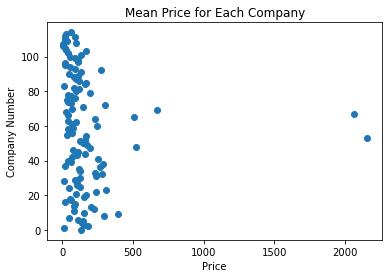

In [30]:
av_prices_by_stock = stock_prices_df.select_dtypes(include='number').mean()
av_prices_by_stock.index = pd.Series(range(len(av_prices_by_stock)))
plt.scatter(x = av_prices_by_stock.values,
            y = av_prices_by_stock.index,
           )
plt.xlabel('Price')
plt.ylabel('Company Number')
plt.title('Mean Price for Each Company')

<div class="alert alert-block alert-warning">
<b>Not Great:</b> That does not look so great with a small number of obvious outliers.
</div>

Lets check to see if these represent errors or just outliers.

In [31]:
# Largest two price values by stock
stock_prices_df.select_dtypes(include='number').max().sort_values()[-2:]


AZO     2579.00000
BKNG    2703.26001
dtype: float64

Checking these manually to price sources **, the prices look accurate.  Thus the values represent outliers rather than errors.

While there are several ways to handle these outliers depending the analysis being performed and the reason for the outliers, for our analysis we are going to retain them in our data set.

** 
https://finance.yahoo.com/quote/NVR?p=NVR&.tsrc=fin-srch
https://finance.yahoo.com/quote/BKNG?p=BKNG&.tsrc=fin-srch

**Examing the Number of Records for Each Stock**

In [32]:
print(stock_prices_df.describe().loc['count'].describe())

count    115.000000
mean     251.852174
std        0.423922
min      249.000000
25%      252.000000
50%      252.000000
75%      252.000000
max      252.000000
Name: count, dtype: float64


<div class="alert alert-block alert-success">
The maximum number of rows is 252, and this is the case for >75% of the rows.  As a reasonableness check, there are 260 (52 * 5) week days in the year and some of these will be public holidays.  So we expect somewhere around 250 trading days in a year given stock markets are not open on week-ends and we have to then deduct for public holidays - so 252 looks reasonable.
</div>

# Format Share Pricing Data

## Convert Share Prices to USD Equivalent

In [33]:
#Then we convert the dates to datetime format and set them as the index

stock_prices_df['Date'] = pd.to_datetime(stock_prices_df['Date'], format = "%Y-%m-%d")
stock_prices_df = stock_prices_df.set_index('Date', drop=True)

Now we add a column for the FX rate applicable given the ticker code format:
* Australian stocks have .AX in their ticker, 
* Japanese stocks have .T, 
* Hong Kong stocks .HK, 
* Singapore stocks .SI; and
* US stocks have no period in their ticker

In [34]:
# Add currency column based on ticker code format
for ticker in stock_prices_df.columns:
    if ".AX" in ticker:
        stock_prices_df[ticker] = stock_prices_df[ticker] * fx_prices["AUDUSD=X"]
    elif ".HK" in ticker:
        stock_prices_df[ticker] = stock_prices_df[ticker] * fx_prices["HKDUSD=X"]
    elif ".T" in ticker:
        stock_prices_df[ticker] = stock_prices_df[ticker] * fx_prices["JPYUSD=X"]
    elif ".SI" in ticker:
        stock_prices_df[ticker] = stock_prices_df[ticker] * fx_prices["SGDUSD=X"]

## Eliminate shares with less than 245 trading days

In [35]:
# Identify Names Which Should be Eliminated
low_counts = stock_prices_df.count()[stock_prices_df.count()<250]
print(low_counts)

low_counts = list(low_counts.index)
print(low_counts)

ANZ.AX    249
dtype: int64
['ANZ.AX']


In [36]:
# Eliminate Names with a Low Number of Trading Days Present
stock_prices_df = stock_prices_df.drop(columns=low_counts).copy()

In [37]:
# Check removal was successful
stock_prices_df.count().min()

251

&#x2705;

## Fill Prices for Names Missing only a Small Number of Days

In [38]:
# Forward fill any missing stock prices
stock_prices_df.fillna(method='ffill', inplace=True)

# Backward fill any remaining missing stock prices
stock_prices_df.fillna(method='bfill', inplace=True)

stock_prices_df

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,NCM.AX,NST.AX,PLS.AX,RIO.AX,RMD.AX,T,TECH,WBC.AX,WDS.AX,WRB
Date,,,,,,,,,,,,,,,,,,,,,
2021-12-31,157.838776,17.959999,227.873291,176.032745,126.515991,130.465118,136.453796,44.450001,404.244263,567.059998,...,17.063063,6.543083,2.467495,66.696533,25.832441,16.512590,128.615051,14.316419,13.916643,53.633774
2022-01-03,154.908508,18.750000,224.928452,180.434280,126.534691,130.200058,134.805542,44.549999,397.086761,564.369995,...,17.063063,6.543083,2.467495,66.696533,25.832441,17.069725,121.268669,14.316419,13.916643,52.898167
2022-01-04,149.671646,19.020000,225.184937,178.144302,126.291756,128.963058,131.635162,45.130001,394.249115,554.000000,...,17.063063,6.543083,2.467495,66.696533,25.832441,17.210688,116.353676,14.316419,13.916643,53.685844
2022-01-05,147.107681,18.680000,224.614960,173.405685,126.955154,130.082245,131.043716,44.599998,387.306122,514.429993,...,17.377001,6.615100,2.523780,67.606146,25.117225,17.593298,108.077499,14.517221,14.057268,53.086956
2022-01-06,147.622437,18.570000,229.554703,170.510956,126.357178,128.069641,131.024323,44.860001,368.602905,514.119995,...,16.795601,6.299028,2.390925,67.927960,24.094976,17.526175,106.041412,14.242419,13.677448,53.991798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,148.481873,12.710000,141.008759,131.477127,158.336105,169.002655,106.645424,63.380001,263.014862,338.450012,...,13.698630,7.310921,2.471336,75.068857,20.972921,17.485209,82.562065,15.187068,22.575913,72.699135
2022-12-27,148.800293,12.530000,142.721176,129.652435,158.229309,167.998657,107.029884,63.619999,262.243866,335.089996,...,13.698630,7.310921,2.471336,75.068857,20.972921,17.628452,82.043106,15.187068,22.575913,73.154449
2022-12-28,147.347595,12.320000,142.996735,125.674026,157.491501,166.368362,106.300385,62.599998,260.079224,328.329987,...,13.838365,7.407739,2.398796,77.205864,20.471516,17.399265,80.526199,15.298645,23.354187,72.055794


# Create a Universe of Pairs

Now that we have imported and cleansed the data, we need to start manipulating it to get the answers required.

Key to this is breaking the price data for all the companies into pairs that can be analyzed.  For Example, Microsoft (MSFT) vs Google (GOOGL).


Using all the names we have data for, we can create a list of all possible pair combinations using the itertools library.

In [39]:
all_possible_pairs = [list(pair) for pair in itertools.combinations(stock_prices_df.columns, 2)]

print(f"The Number of All Possible Unique Pairs is: {len(all_possible_pairs):,.0f}")
print(f"\nSome Examples: {all_possible_pairs[:5]} \n{all_possible_pairs[-5:]}")


The Number of All Possible Unique Pairs is: 6,441

Some Examples: [['A', 'AAL'], ['A', 'AAP'], ['A', 'AAPL'], ['A', 'ABBV'], ['A', 'ABC']] 
[['TECH', 'WDS.AX'], ['TECH', 'WRB'], ['WBC.AX', 'WDS.AX'], ['WBC.AX', 'WRB'], ['WDS.AX', 'WRB']]


We may want to instead look at a sample of names, instead of the full universe.  This may be because we have processing constrainsts etc.  However, we want a random sample rather than just picking the first 100 names in case their is some bias in the way they are ordered.

We have set the sample size via the input constant (RDM_SAMPLE_SIZE) in the Set Inputs section.

In [40]:
# Select a sample of pairs randomly from the our universe of all possible pairs
random_pairs = sample(all_possible_pairs, RDM_SAMPLE_SIZE)
print(random_pairs[:5])

[['AMT', 'CPT'], ['APTV', 'BIIB'], ['A', 'NAB.AX'], ['AKAM', 'MMM'], ['AFL', 'PLS.AX']]


## Add Industry to Pairs List

The key factor we are seeking to test is Industry.  That is, if in names in the same industry show better correlation or related statistics vs random pairs. 

To do this we are going to have to merge information from multiple inputs:
- the ticker names for the pairs will come from the list of pairs we generated;
- the Industry name will come from the all_stocks_info_df
- Same Industry Column will be a engineered column we create

The Same Industry column will make queries and analysis on the dataset simplier.


In [41]:
# Build a DataFrame which lists all possible pairs, the industry of each name in the pair and if they are the same.

# Start with the all the pair combinations
all_possible_pairs_df = pd.DataFrame(all_possible_pairs, columns=['Ticker1', 'Ticker2'])

# write to csv to check file size
all_possible_pairs_df.to_csv("all_possible_pairs_df.csv")

# Add the Industry Name for the first ticker
all_possible_pairs_df = pd.merge(all_possible_pairs_df, all_stocks_info_df[['Symbol', 'GICS Sector']], how='inner', left_on = 'Ticker1', right_on = 'Symbol')
# Add the Industry name for the second ticker
all_possible_pairs_df = pd.merge(all_possible_pairs_df, all_stocks_info_df[['Symbol', 'GICS Sector']], how='inner', left_on = 'Ticker2', right_on = 'Symbol')

# Remove excess columns and tidy up column names
all_possible_pairs_df.drop(columns = ['Symbol_x', 'Symbol_y'], inplace=True)
all_possible_pairs_df.rename(columns={"GICS Sector_x": "Ind1", "GICS Sector_y": "Ind2"}, inplace=True)

# Create a new column 'Same Industry' which identifies if all the two names in the pair are from the same industry
all_possible_pairs_df['Same Industry'] = np.where(all_possible_pairs_df['Ind1'] == all_possible_pairs_df['Ind2'], 'Yes', 'No')
all_possible_pairs_df

,Ticker1,Ticker2,Ind1,Ind2,Same Industry
0,A,AAL,Health Care,Industrials,No
1,A,AAP,Health Care,Consumer Discretionary,No
2,AAL,AAP,Industrials,Consumer Discretionary,No
3,A,AAPL,Health Care,Information Technology,No
4,AAL,AAPL,Industrials,Information Technology,No
...,...,...,...,...,...
6436,RMD.AX,WRB,Health Care,Financials,No
6437,T,WRB,Communication Services,Financials,No
6438,TECH,WRB,Health Care,Financials,No
6439,WBC.AX,WRB,Financials,Financials,Yes


Construct a DataFrame for the Random Pairs sample in the same format as that for all the possible pairs.

In [42]:
#Build the base df from the list of list of random pairs
random_pairs_df = pd.DataFrame(random_pairs, columns=['Ticker1', 'Ticker2'])

# Add the extra columns required via merging with the df containing all the pairs
random_pairs_df = pd.merge(random_pairs_df, all_possible_pairs_df, how='inner',
                          left_on= ['Ticker1', 'Ticker2'],
                          right_on= ['Ticker1', 'Ticker2'])

random_pairs_df


,Ticker1,Ticker2,Ind1,Ind2,Same Industry
0,AMT,CPT,Real Estate,Real Estate,Yes
1,APTV,BIIB,Consumer Discretionary,Health Care,No
2,A,NAB.AX,Health Care,Financials,No
3,AKAM,MMM,Information Technology,Industrials,No
4,AFL,PLS.AX,Financials,Materials,No
...,...,...,...,...,...
3995,AWK,GOOGL,Utilities,Communication Services,No
3996,AMP,WBC.AX,Financials,Financials,Yes
3997,AMGN,PLS.AX,Health Care,Materials,No
3998,ADM,CCL,Consumer Staples,Consumer Discretionary,No


### Analysis of Names by Sector ###

In [43]:
all_stocks_info_df['GICS Sector'].describe()

count            115
unique            11
top       Financials
freq              22
Name: GICS Sector, dtype: object

In [44]:
print(f"The Minimum Number of Members within a Sector Group is: {all_stocks_info_df.groupby('GICS Sector').size().min()}")
print(f"The Median Number of Members within a Sector Group is: {all_stocks_info_df.groupby('GICS Sector').size().median()}")


The Minimum Number of Members within a Sector Group is: 3
The Median Number of Members within a Sector Group is: 11.0


In [45]:
all_stocks_info_df.groupby('GICS Sector').size()

GICS Sector
Communication Services     4
Consumer Discretionary    11
Consumer Staples           5
Energy                     3
Financials                22
Health Care               18
Industrials               13
Information Technology    14
Materials                 12
Real Estate                7
Utilities                  6
dtype: int64

### Build and Display Graphs Analysing the Distribution of the Sector Groups

In [46]:
# Get Counts of The Number of Names Within Each Sector
sub_industry_counts = all_stocks_info_df.groupby('GICS Sector')['Symbol'].count().sort_values(axis=0)

# Bucket The Industries into Those That Have a High Number of Members and "Others"
sub_industry_graph_series = sub_industry_counts[-8:]
sub_industry_graph_series['Other'] = sub_industry_counts[:-8].sum()

In [47]:
# Create a seaborn color palette for our graphs
colors = sns.color_palette("Blues", len(sub_industry_graph_series))

In [48]:
# Function to Create a Series of Graphs to Show the Distribution and Makeup of the Sector Membership
def display_subindustry_graphs(colors, sub_industry_counts, sub_industry_graph_series):
    
    fig = plt.figure(figsize=(10, 25))
    fig.suptitle('Sector Category Splits', y = 0.95, fontweight='bold')

    """
    # Display Histogram Showing What Are the Most Common Number of Members Within a Sector Group
    ax = fig.add_subplot(4, 1, 1)
    ax.hist(sub_industry_counts,
            bins = len(np.arange(1,sub_industry_counts.max())+1),
            )
    ax.set_ylabel('Frequency of Occurence')
    ax.set_xlabel('Number of Members Within Sub-Index')
    ax.set_title('Breakout of the Number of Members Within Each Sector')
    """

    # Display Pie Chart
    ax = fig.add_subplot(3, 1, 1)
    ax.pie(sub_industry_graph_series,
        labels = sub_industry_graph_series.index,
        colors = colors,
            )
    ax.set_title('Sub_Industry Category Split', fontweight='bold')

    # Bar Chart of the Sub-Industries With the Most Members
    ax = fig.add_subplot(3, 1, 2)
    ax.barh(sub_industry_graph_series[:-1].index , sub_industry_graph_series[:-1].values)
    ax.set_title('Top Sector Member Numbers', fontweight='bold')

    # Display Box Plot
    ax = fig.add_subplot(3, 1, 3)
    ax.boxplot(all_stocks_info_df.groupby('GICS Sector')['Symbol'].count())
    ax.set_title('Distribution of Number of Members Within Each Sector', fontweight='bold')

    #fig.tight_layout()
    plt.subplots_adjust(hspace = 0.5)
    
    return fig

When we review the how many stocks/ companies fall into each Sector we see that most Sub-Industries only have a very small number of members.  However, there are also a small number of Sub-Industries that have 10 plus members.

So the distribution is definitely quite skewed.

The following graphs demonstrate that distribution and also highlights which Sector groups have the most number of members.

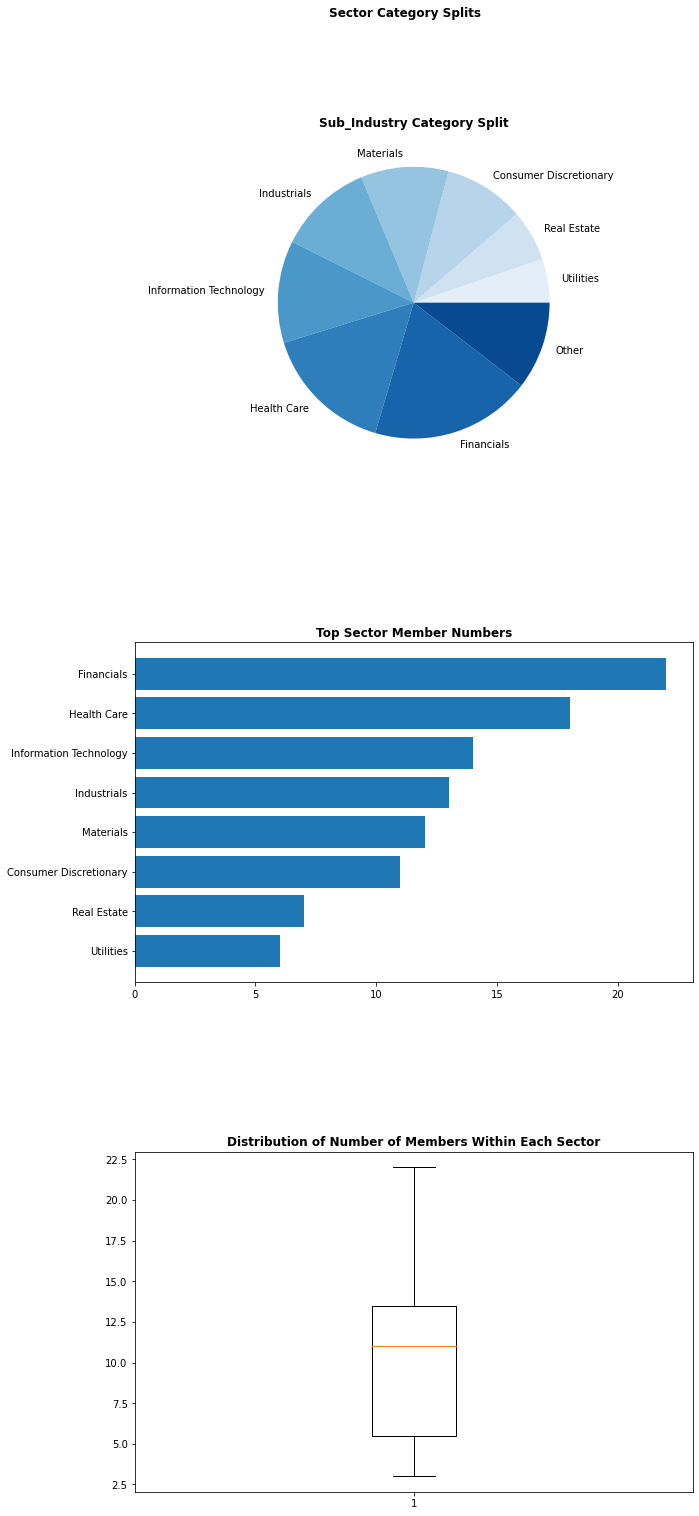

In [49]:
fig = display_subindustry_graphs(colors, sub_industry_counts, sub_industry_graph_series)
#plt.show()

Where the Sector only has a single member, comparing members within the same industry will not be possible.

Given we are looking to compare companies within the same industry vs companies not in the same industry, we want to identify if any sectors have less than 2 names in them.

In [50]:
all_stocks_info_df.groupby('GICS Sector')['Symbol'].count()

GICS Sector
Communication Services     4
Consumer Discretionary    11
Consumer Staples           5
Energy                     3
Financials                22
Health Care               18
Industrials               13
Information Technology    14
Materials                 12
Real Estate                7
Utilities                  6
Name: Symbol, dtype: int64

## Analyse Ratio of Same Industry Vs Different Industry Pairs

### Full Universe of Names

In [51]:
num_pairs_all = len(all_possible_pairs_df.index)
num_pairs_same_ind_all = len(all_possible_pairs_df[all_possible_pairs_df['Same Industry'] == 'Yes'].index)

print(f"Number of Pairs In Total: {num_pairs_all:,}")
print(f"Number of Pairs in the Same Industry: {num_pairs_same_ind_all:,}")
print(f"Percentage of pairs in the same industry: {num_pairs_same_ind_all/num_pairs_all * 100:,.02f}%")

Number of Pairs In Total: 6,441
Number of Pairs in the Same Industry: 708
Percentage of pairs in the same industry: 10.99%


### Sample

In [52]:
num_pairs_all_samp = len(random_pairs_df.index)
num_pairs_same_ind_samp = len(random_pairs_df[random_pairs_df['Same Industry'] == 'Yes'].index)

print(f"Number of Pairs In Total: {num_pairs_all_samp:,}")
print(f"Number of Pairs in the Same Industry: {num_pairs_same_ind_samp:,}")
print(f"Percentage of pairs in the same industry: {num_pairs_same_ind_samp/num_pairs_all_samp * 100:,.02f}%")

Number of Pairs In Total: 4,000
Number of Pairs in the Same Industry: 436
Percentage of pairs in the same industry: 10.90%


In [53]:
df = pd.DataFrame(data = [[num_pairs_all, num_pairs_same_ind_all, num_pairs_same_ind_all/num_pairs_all * 100], 
                          [num_pairs_all_samp, num_pairs_same_ind_samp, num_pairs_same_ind_samp/num_pairs_all_samp * 100]], 
                  columns=['Number of Total Pairs', 'Number of Pairs in Same Industry', '% of Pairs in the Same Industry'])
df.index = ['Entire Population', 'Sample']
df

,Number of Total Pairs,Number of Pairs in Same Industry,% of Pairs in the Same Industry
Entire Population,6441,708,10.992082
Sample,4000,436,10.900000


<div class="alert alert-block alert-success">
Our sample does seem representative of the total population in term pairs in the same industry vs all pairs.
</div>

# Correlation

# Calculate The Correlation Between Various Pairs

In [54]:
corr_array = []
for i in range(len(random_pairs_df)):
    
    #ratio = stock_prices_df[pair[0]]/ stock_prices_df[pair[1]]
    corr = stock_prices_df[random_pairs[i][0]].corr(stock_prices_df[random_pairs[i][1]])
    
    corr_array.append([random_pairs[i][0], random_pairs[i][1], corr])
    
    i += 1
    
corr_df = pd.DataFrame(data=corr_array, columns=['Ticker1', 'Ticker2', 'Correlation'])
corr_df = pd.merge(corr_df, random_pairs_df, how='inner',
                  left_on = ['Ticker1', 'Ticker2'], right_on = ['Ticker1', 'Ticker2'])

corr_df

,Ticker1,Ticker2,Correlation,Ind1,Ind2,Same Industry
0,AMT,CPT,0.548909,Real Estate,Real Estate,Yes
1,APTV,BIIB,-0.100933,Consumer Discretionary,Health Care,No
2,A,NAB.AX,0.144817,Health Care,Financials,No
3,AKAM,MMM,0.824352,Information Technology,Industrials,No
4,AFL,PLS.AX,0.617375,Financials,Materials,No
...,...,...,...,...,...,...
3995,AWK,GOOGL,0.592710,Utilities,Communication Services,No
3996,AMP,WBC.AX,0.482187,Financials,Financials,Yes
3997,AMGN,PLS.AX,0.430369,Health Care,Materials,No
3998,ADM,CCL,-0.382983,Consumer Staples,Consumer Discretionary,No


In [55]:
stock_prices_df.iloc[:,:5].head()

,A,AAL,AAP,AAPL,ABBV
Date,,,,,
2021-12-31,157.838776,17.959999,227.873291,176.032745,126.515991
2022-01-03,154.908508,18.750000,224.928452,180.434280,126.534691
2022-01-04,149.671646,19.020000,225.184937,178.144302,126.291756
2022-01-05,147.107681,18.680000,224.614960,173.405685,126.955154
2022-01-06,147.622437,18.570000,229.554703,170.510956,126.357178


## Analyze Correlations

We are analyzing the absolute values of the correlations as we are interested in the magnitude of the corrleations - negative correlations are as usual as positive ones.

In [56]:
corr_all = abs(corr_df['Correlation']).describe()
corr_same_ind = abs(corr_df[corr_df['Same Industry'] == 'Yes']['Correlation']).describe()

df = pd.DataFrame(corr_all)
df = pd.DataFrame({'Corr all': corr_all, 'Corr Same Industry': corr_same_ind})

df.loc['Median', :] \
= [abs(corr_df['Correlation']).median(), abs(corr_df[corr_df['Same Industry'] == 'Yes']['Correlation']).median()]
df

,Corr all,Corr Same Industry
count,4000.000000,436.000000
mean,0.431248,0.487683
std,0.264173,0.273662
min,0.000429,0.000429
25%,0.200661,0.256404
50%,0.416689,0.496109
75%,0.642345,0.719607
max,0.958224,0.958224
Median,0.416689,0.496109


<div class="alert alert-block alert-info">
<b>Finding:</b> At a summary level there does appear to be a higher correlation level for pairs in the same industry</div>

## Analyse by Industry : Are Some Industry Groups Better Than Others?

Build a DataFrame which gives us some summary info by Industry for Pairs Which are Both in the Same Industry

In [57]:
# Take the df of all correlations, extract same industry pairs and get the median correlation and count for those those pairs
df = corr_df[corr_df['Same Industry'] == 'Yes'].groupby('Ind1').agg(Median =('Correlation', 'median'),\
                                                                   Count=('Correlation','count'))
df = df.reset_index()
df['Median'] = abs(df['Median'])
df = df.sort_values(['Median', 'Count']).set_index('Ind1', drop=True)
df.index.name = ""


If we only have one pair in an industry, it is difficult to make any comparision of that industry vs another.  Thus we will limit our comparison to industries with at least 8 names in it.

In [58]:
# Limit our target dataframe to only the top 10 names by count frequency
df = df.sort_values('Count')
df = df.tail(10)
df = df.sort_values('Median')
df

,Median,Count
,,
Communication Services,0.008098,4
Materials,0.110106,43
Consumer Staples,0.169015,6
Health Care,0.212959,92
Utilities,0.356447,7
Industrials,0.393014,52
Financials,0.405350,126
Information Technology,0.668683,56
Consumer Discretionary,0.712117,32


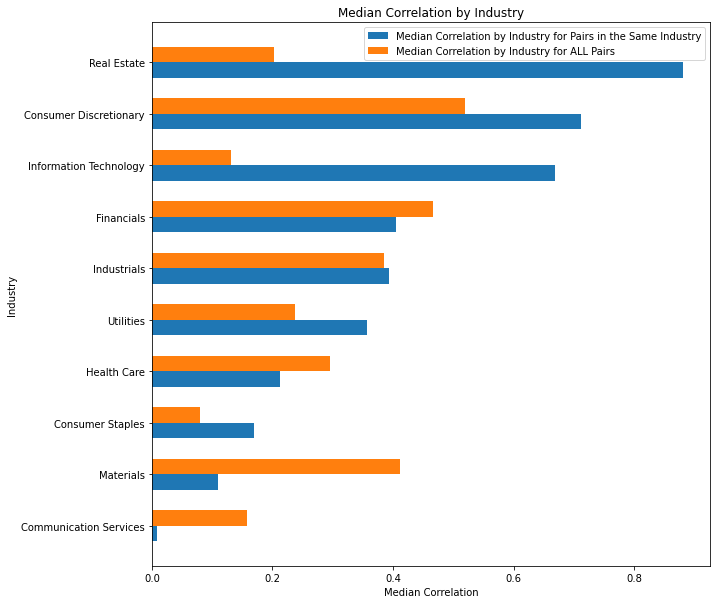

In [59]:
# Calculate median correlations
medians_same_ind = abs(df['Median'])
medians_all_ind = abs(corr_df.groupby('Ind1')['Correlation'].median())

# We only want to plot the industries that have sufficient same industry pairs
medians_all_ind = medians_all_ind[medians_all_ind.index.isin(df.index)]

# Create figure and axis
fig, ax = plt.subplots(figsize=[10,10])

# Set a width for the bars
bar_width = 0.3

# We have to define bar positions if we want the different plots to be side by side
bar1_positions = np.arange(len(medians_same_ind))
bar2_positions = bar1_positions + bar_width # Puts the position beside the prior bar

# Create our bar charts
ax.barh(bar1_positions, medians_same_ind, height=bar_width, label='Median Correlation by Industry for Pairs in the Same Industry')
ax.barh(bar2_positions, medians_all_ind, height=bar_width, label='Median Correlation by Industry for ALL Pairs')

# Define y labels and title
ax.set_yticks(bar1_positions + bar_width / 2)
ax.set_yticklabels(medians_same_ind.index)
ax.set_xlabel('Median Correlation')
ax.set_ylabel('Industry')
ax.set_title('Median Correlation by Industry')

# Show legend
ax.legend()

# Show plot
#plt.show()

<div class="alert alert-block alert-info">
<b>Finding:</b> The range of correlations does vary signficantly across industries
</div>

<div class="alert alert-block alert-info">
<b>Finding:</b> This graph also reinforces the earlier finding that the correlation levels are higher for pairs which are both in the same industry vs disparate pairs - as the same industry pairs have higher correlation for almost all industries</div>

# CoIntegration

In [60]:
#pscore_1yr, pvalue_1yr, _ = coint(train_series1,train_series2)

# References

wikipedia: 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'

data sources: yahoo finance



ASX: https://www.asx.com.au/data/dw_sharesbyvalue.pdf

Used the ASX document for determining the top companies by market cap and their symbol.
Supplemented that with details from Yahoo Finance's, looking at each company's profile on Yahoo Finance.


# Discarded Graphs etc

array([[<AxesSubplot:xlabel='A', ylabel='A'>,
        <AxesSubplot:xlabel='AAL', ylabel='A'>,
        <AxesSubplot:xlabel='AAP', ylabel='A'>],
       [<AxesSubplot:xlabel='A', ylabel='AAL'>,
        <AxesSubplot:xlabel='AAL', ylabel='AAL'>,
        <AxesSubplot:xlabel='AAP', ylabel='AAL'>],
       [<AxesSubplot:xlabel='A', ylabel='AAP'>,
        <AxesSubplot:xlabel='AAL', ylabel='AAP'>,
        <AxesSubplot:xlabel='AAP', ylabel='AAP'>]], dtype=object)

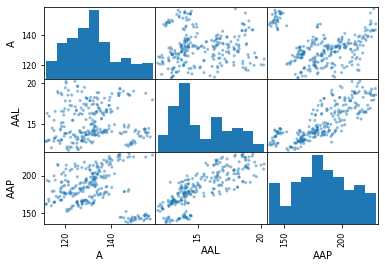

In [61]:
graph_df = stock_prices_df.iloc[:,:3].copy()

pd.plotting.scatter_matrix(graph_df)

In [62]:
# A Pairplot on Correlations Might Show Something About Industries

# Not really!

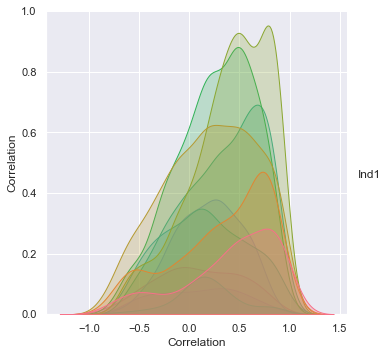

In [63]:

sns.set()
sns.pairplot(
    #data = corr_df.head(),
    data = corr_df,
    hue = 'Ind1',
    height = 5
        )


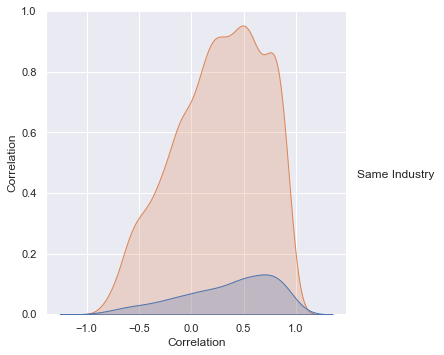

In [64]:
sns.pairplot(
    #data = corr_df.head(),
    data = corr_df,
    hue = 'Same Industry',
    height = 5
    
        )

In [65]:
# Observe when notebook was last run all the way through successfully

print(datetime.now())

2023-07-31 12:08:05.835586
